# Audit Data Risk

## Importing Libraries

In [37]:
import pandas as pd # used for handling the dataset
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.neural_network import MLPClassifier # used for neural network
from sklearn.metrics import accuracy_score # used for checking the accuracy
from sklearn.metrics import classification_report # used for generating the classification report
import matplotlib.pyplot as plt # used for plotting the graph
import seaborn as sns # used for plotting interactive graph


## Importing dataset

In [38]:
dataset = pd.read_csv('audit_risk.csv')

## Explore dataset

In [39]:
dataset

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

## Data Preprocessing

Money_Value punya null value, kita isi dengan modus dari Money_Value

In [41]:
dataset['Money_Value'] = dataset['Money_Value'].fillna(dataset['Money_Value'].mean())

In [42]:
dataset["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

Ada 3 value yang non numeric di LOCATION_ID, kita hapus barisnya

In [43]:
dataset = dataset[(dataset.LOCATION_ID != 'LOHARU')]
dataset = dataset[(dataset.LOCATION_ID != 'NUH')]
dataset = dataset[(dataset.LOCATION_ID != 'SAFIDON')]
print("Banyak baris sekarang adalah", dataset.shape[0])

Banyak baris sekarang adalah 773


Karena semuanya sudah numerik, ubah semua tipe data kolom menjadi float

In [44]:
dataset = dataset.astype(float)

Hapus data yang duplikat

In [45]:
dataset = dataset.drop_duplicates()
print("Banyak baris sekarang adalah", dataset.shape[0])

Banyak baris sekarang adalah 760


Correlation Matrix

<AxesSubplot: >

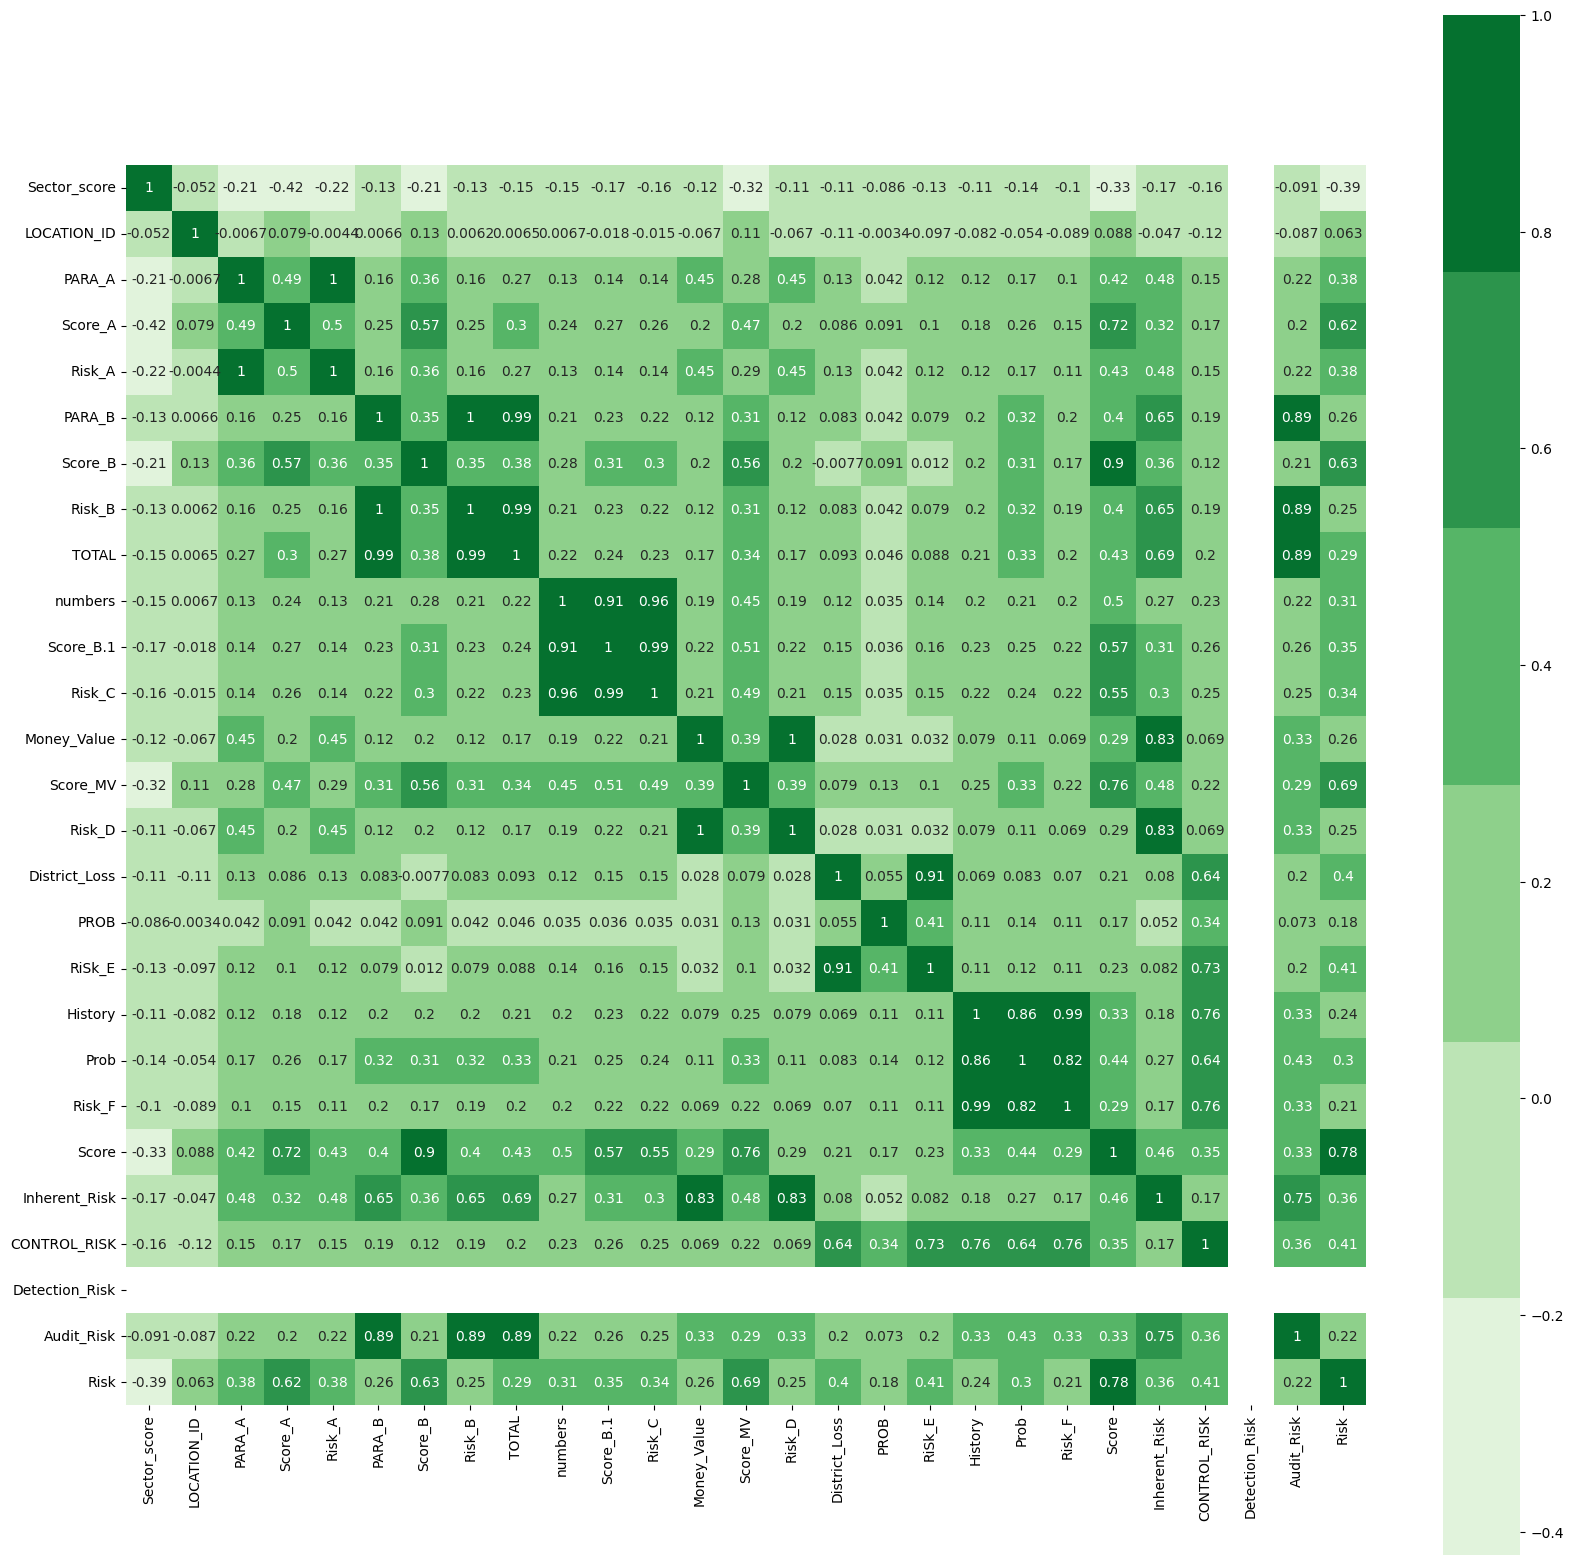

In [46]:
plt.subplots(figsize=(20,20))
sns.heatmap(dataset.corr(), cmap=sns.color_palette("Greens"), annot=True, square=True)

Tidak ada data yang terlalu berkorelasi, jadi kemungkinan overfitting karena multicollinearity kecil.

Bagi data menjadi X (datanya) dan Y (hasilnya)

In [47]:
Y = dataset['Risk']
X = dataset.drop(['Risk'], axis=1)

Bagi data menjadi dua; training dan testing

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=10)

Lakukan scaling pada data menggunakan Min Max Scaling  

In [49]:
scaler = StandardScaler()
# Gunakan X_train untuk fitting scaler
scaler.fit(X_train)
# Transform X_train dan X_test
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

Cek data X train dan Y train

In [50]:
X_train

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
7,-0.656497,-0.687554,0.955074,1.433647,0.978926,0.018034,1.705585,0.022689,0.123577,2.009176,...,-0.160185,-0.418193,-0.214796,-0.235938,-0.192421,1.773928,0.004560,-0.438043,0.0,-0.084977
304,-0.719580,-0.994030,-0.409589,-0.878441,-0.375992,-0.184221,-0.661985,-0.189937,-0.224620,-0.282717,...,-0.160185,-0.418193,-0.214796,-0.235938,-0.192421,-0.822140,-0.289331,-0.438043,0.0,-0.162598
1,-0.656497,-0.891871,-0.412807,-0.878441,-0.377055,-0.112453,-0.661985,-0.166030,-0.154767,-0.282717,...,-0.160185,-0.418193,-0.214796,-0.235938,-0.192421,-0.822140,-0.272035,-0.438043,0.0,-0.158030
643,1.488342,-1.096189,-0.412807,-0.878441,-0.377055,-0.176428,0.521800,-0.179492,-0.217351,-0.282717,...,-0.160185,-0.418193,-0.214796,-0.235938,-0.192421,-0.114121,-0.283363,-0.438043,0.0,-0.161022
657,1.488342,-0.994030,-0.412807,-0.878441,-0.377055,-0.199988,-0.661985,-0.195189,-0.240398,-0.282717,...,-0.160185,-0.418193,-0.214796,-0.235938,-0.192421,-0.822140,-0.292619,-0.438043,0.0,-0.163466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,-0.735351,-0.687554,-0.340390,-0.878441,-0.353126,-0.199988,-0.661985,-0.195189,-0.232420,-0.282717,...,-0.160185,-0.418193,-0.214796,-0.235938,-0.192421,-0.822140,-0.291046,-0.438043,0.0,-0.163051
321,-0.719580,0.129715,-0.208430,0.277603,-0.241989,-0.181684,0.521800,-0.182994,-0.199976,-0.282717,...,-0.160185,-0.418193,-0.214796,-0.235938,-0.192421,0.121885,-0.272249,-0.438043,0.0,-0.158086
532,0.078924,-0.687554,-0.351655,-0.878441,-0.356849,-0.191289,-0.661985,-0.192291,-0.225151,-0.282717,...,-0.160185,-0.418193,-0.214796,-0.235938,-0.192421,-0.822140,-0.288402,-0.438043,0.0,-0.162352
125,-0.676418,-0.278920,3.674744,1.433647,3.674937,0.737708,1.705585,0.741885,1.127214,-0.282717,...,-0.160185,2.406934,4.906623,6.001026,5.334757,2.481946,0.705909,5.030752,0.0,1.451972


In [51]:
Y_train

7      1.0
304    0.0
1      0.0
643    0.0
657    0.0
      ... 
373    0.0
321    0.0
532    0.0
125    1.0
266    0.0
Name: Risk, Length: 608, dtype: float64

Plotting training data

## Train Model dengan MLP Classifier

In [52]:
mlp = MLPClassifier(hidden_layer_sizes=(5), max_iter=1000, activation='relu', solver='adam', shuffle=True, random_state=1, verbose=True)
mlp.fit(X_train,Y_train)

Iteration 1, loss = 0.68616571
Iteration 2, loss = 0.66617602
Iteration 3, loss = 0.64601456
Iteration 4, loss = 0.62882409
Iteration 5, loss = 0.61264509
Iteration 6, loss = 0.59754122
Iteration 7, loss = 0.58322188
Iteration 8, loss = 0.56985679
Iteration 9, loss = 0.55728463
Iteration 10, loss = 0.54559351
Iteration 11, loss = 0.53488839
Iteration 12, loss = 0.52451473
Iteration 13, loss = 0.51491710
Iteration 14, loss = 0.50555280
Iteration 15, loss = 0.49668832
Iteration 16, loss = 0.48816980
Iteration 17, loss = 0.47981342
Iteration 18, loss = 0.47166864
Iteration 19, loss = 0.46344471
Iteration 20, loss = 0.45559146
Iteration 21, loss = 0.44815787
Iteration 22, loss = 0.44088148
Iteration 23, loss = 0.43397169
Iteration 24, loss = 0.42709140
Iteration 25, loss = 0.42035677
Iteration 26, loss = 0.41368352
Iteration 27, loss = 0.40697406
Iteration 28, loss = 0.40010541
Iteration 29, loss = 0.39326204
Iteration 30, loss = 0.38660948
Iteration 31, loss = 0.38011199
Iteration 32, los

MLPClassifier(hidden_layer_sizes=5, max_iter=1000, random_state=1, verbose=True)

## Test Model dengan Data X_test

In [57]:
predictions_train = mlp.predict(X_train)
predictions = mlp.predict(X_test)

In [60]:
print("Performansi model pada test data")
print()
print(classification_report(Y_test,predictions))
print()
print("Tingkat akurasi adalah: {:.2f}%".format(accuracy_score(Y_test, predictions)*100))


Performansi model pada test data

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        84
         1.0       0.98      0.96      0.97        68

    accuracy                           0.97       152
   macro avg       0.97      0.97      0.97       152
weighted avg       0.97      0.97      0.97       152


Tingkat akurasi adalah: 97.37%
